In [91]:
!git clone https://github.com/QCDHUB/jam3dlib.git
!git clone https://github.com/pitonyak25/jam3d_dev_lib.git

Cloning into 'jam3dlib'...
remote: Enumerating objects: 323, done.
remote: Counting objects: 100% (323/323), done.
remote: Compressing objects: 100% (177/177), done.
remote: Total 323 (delta 179), reused 267 (delta 141), pack-reused 0
Receiving objects: 100% (323/323), 4.83 MiB | 8.98 MiB/s, done.
Resolving deltas: 100% (179/179), done.
Cloning into 'jam3d_dev_lib'...
remote: Enumerating objects: 9916, done.
remote: Counting objects: 100% (2844/2844), done.
remote: Compressing objects: 100% (1434/1434), done.
remote: Total 9916 (delta 1411), reused 2843 (delta 1410), pack-reused 7072
Receiving objects: 100% (9916/9916), 940.56 MiB | 14.06 MiB/s, done.
Resolving deltas: 100% (1723/1723), done.
Updating files: 100% (10930/10930), done.


In [92]:
import os,sys
sys.path.append('/content/jam3d_dev_lib')
sys.path.append('/content/jam3dlib')
os.environ["JAM3D"] = "/content/jam3d_dev_lib"
from tools.tools     import checkdir,save,load,lprint
import tools.config
from tools.config    import load_config, conf
import numpy as np
from tmd import TMD
import matplotlib as plt
import pylab as py
import pandas as pd

In [93]:
cd jam3dlib

/content/jam3dlib/jam3dlib/jam3dlib


In [94]:
tag='JAM3D_2022' #tag for a given analysis (see "List of Fits")
tmd=TMD(tag)

parman: pdf
order: [1, 'pdf', 'widths1_uv']
order: [1, 'pdf', 'widths1_sea']
parman: pdfpi-
parman: ffpi
order: [1, 'ffpi', 'widths1_fav']
order: [1, 'ffpi', 'widths1_ufav']
parman: ffk
order: [1, 'ffk', 'widths1_fav']
order: [1, 'ffk', 'widths1_ufav']
parman: ffh
parman: transversity
order: [1, 'transversity', 'widths1_uv']
order: [1, 'transversity', 'u N0 1']
order: [1, 'transversity', 'u N1 1']
order: [1, 'transversity', 'u a0 1']
order: [1, 'transversity', 'u b0 1']
order: [1, 'transversity', 'u b1 1']
order: [1, 'transversity', 'd N0 1']
order: [1, 'transversity', 'd N1 1']
order: [1, 'transversity', 'd a0 1']
parman: collinspi
order: [1, 'collinspi', 'widths1_fav']
order: [1, 'collinspi', 'widths1_ufav']
order: [1, 'collinspi', 'u N0 1']
order: [1, 'collinspi', 'u N1 1']
order: [1, 'collinspi', 'u a0 1']
order: [1, 'collinspi', 'u a1 1']
order: [1, 'collinspi', 'u b0 1']
order: [1, 'collinspi', 'u b1 1']
order: [1, 'collinspi', 'u b0 2']
order: [1, 'collinspi', 'u b1 2']
order: [

In [95]:
x=0.1
Q2=10.0
kT=0.1
print(tmd.eval(x,Q2,kT,'p','pdf',0,icol=False))
print(tmd.eval(x,Q2,kT,'p','sivers',0,icol=False))
print(tmd.eval(x,Q2,kT,'p','sivers',0,icol=True))

[7.84175357e+00 3.64503757e+00 5.69564180e-01 2.52804796e+00
 7.06690597e-01 3.31212163e-01 3.31212163e-01 1.26601743e-01
 1.26601743e-01 1.61433295e-04 1.61433295e-04]
[ 0.         -0.54450382  0.          0.87315847  0.          0.
  0.          0.          0.          0.          0.        ]
[ 0.         -0.21872618  0.          0.35074615  0.          0.
  0.          0.          0.          0.          0.        ]


In [96]:
M = 0.93891897
Mpi = 0.135

In [97]:
x=0.1
Q2=10.0
kT=0.1
print(tmd.eval(x,Q2,kT,'p','pdf',0,icol=False))
print(tmd.eval(x,Q2,kT,'p','sivers',0,icol=False))
print(tmd.eval(x,Q2,kT,'p','sivers',0,icol=True))

[7.84175357e+00 3.64503757e+00 5.69564180e-01 2.52804796e+00
 7.06690597e-01 3.31212163e-01 3.31212163e-01 1.26601743e-01
 1.26601743e-01 1.61433295e-04 1.61433295e-04]
[ 0.         -0.54450382  0.          0.87315847  0.          0.
  0.          0.          0.          0.          0.        ]
[ 0.         -0.21872618  0.          0.35074615  0.          0.
  0.          0.          0.          0.          0.        ]


In [98]:
tmd.nrep

465

In [99]:
x=0.1
Q2=10.0
kT=0.1
irep = 0 # this one can be varied in order to create multiple images
def plot_function_u(irep,x,Q2,kTx,kTy):
  kT = np.sqrt(kTx**2 + kTy**2)
  return tmd.eval(x,Q2,kT,'p','pdf',irep,icol=False)[1] - kTx/M * tmd.eval(x,Q2,kT,'p','sivers',irep,icol=False)[1]
kTx,kTy = 0.1,0.1
print(plot_function_u(irep,x,Q2,kTx,kTy))

3.628931235248452


(32, 32, 9)


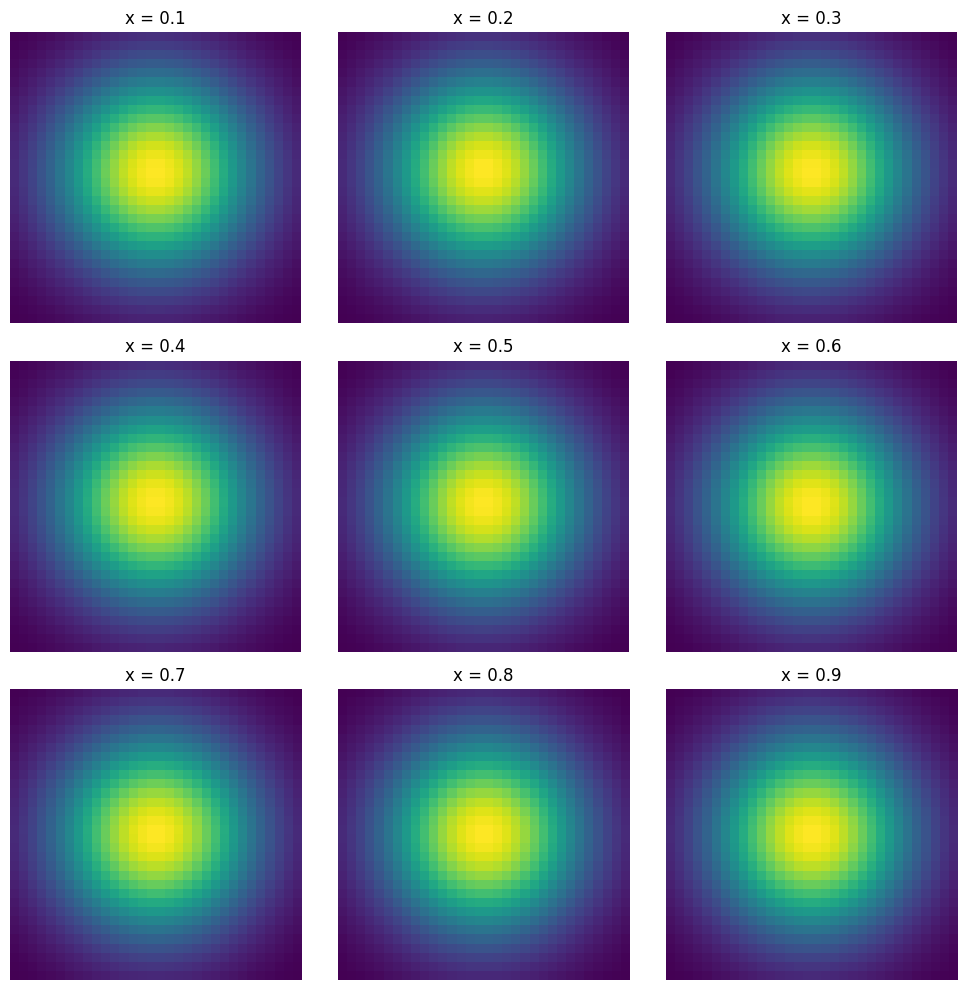

In [32]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.colors import Normalize
import matplotlib.cm as cm

kTx = np.linspace(-1,1,32)
kTy = np.linspace(-1,1,32)
X, Y = np.meshgrid(kTx, kTy)

Z=[]
x = 0.1
Q2 = 10
irep = 0 # this can be changed to produce replicas of images, can be from 0 to 465
for kx in kTx:
  Z1 = []
  for ky in kTy:
        Z2 = []
        for x in range(1,10):
            Z2.append(plot_function_u(irep, x/10, Q2, kx, ky))
        Z1.append(Z2)
  Z.append(Z1)
ND = np.array(Z)
print(ND.shape)
# Plotting 2D slices
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
for i in range(3):
    for j in range(3):
        ax = axs[i, j]
        ax.imshow(ND[:, :, i*3+j], cmap='viridis', interpolation='nearest', origin='lower')
        ax.set_title(f'x = {(i*3+j+1)/10}')
        ax.axis('off')
plt.tight_layout()
plt.show()
# example = plt.imshow(ND[:, :, 0], cmap='viridis', interpolation='none', origin='lower')
# print(example.shape)

<ipython-input-104-dcc24fe36cf4>:80: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(m, shrink=0.4, aspect=10)


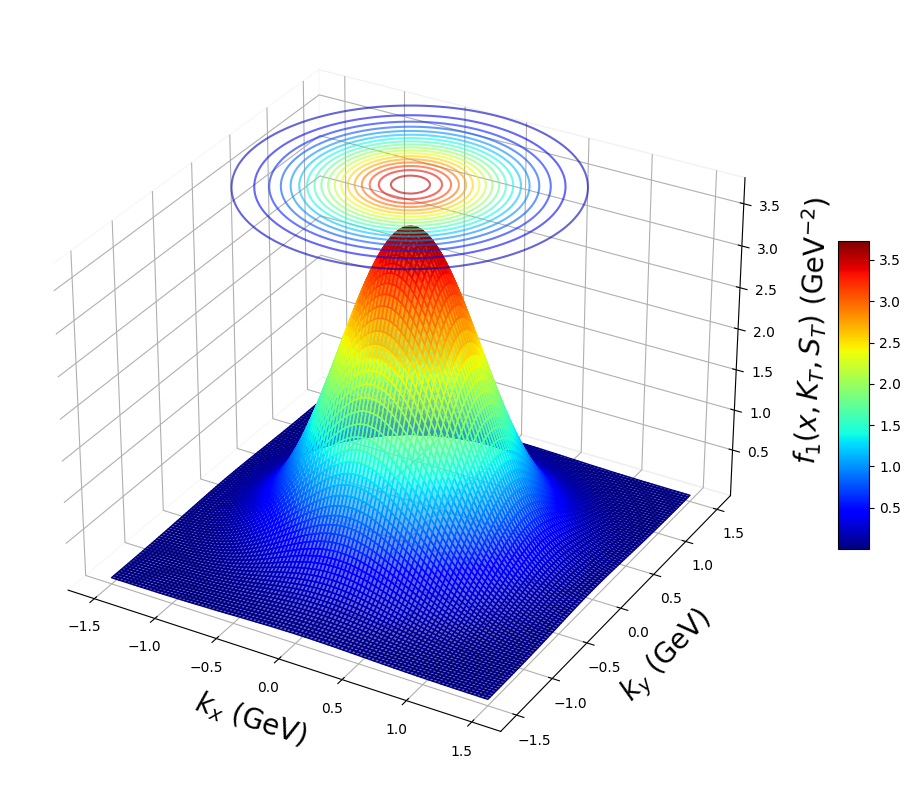

In [104]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import Normalize

# # Importing necessary modules and configurations
# sys.path.append('/content/jam3d_dev_lib')
# sys.path.append('/content/jam3dlib')
# os.environ["JAM3D"] = "/content/jam3d_dev_lib"
# from tools.tools import checkdir, save, load, lprint
# import tools.config
# from tools.config import load_config, conf
# from tmd import TMD

# # Initialize TMD
# tag = 'JAM3D_2022'
# tmd = TMD(tag)

# Function to calculate plot function values
def plot_function_u(irep, x, Q2, kTx, kTy):
    kT = np.sqrt(kTx**2 + kTy**2)
    return tmd.eval(x, Q2, kT, 'p', 'pdf', irep, icol=False)[1] - kTx / M * tmd.eval(x, Q2, kT, 'p', 'sivers', irep, icol=False)[1]
    #return - kTx / M * tmd.eval(x, Q2, kT, 'p', 'sivers', irep, icol=False)[1]

# Setting up the variables
kTx = np.linspace(-1.5, 1.5, 100)
kTy = np.linspace(-1.5, 1.5, 100)
#kTx = np.linspace(-0.75, 0.75, 100)
#kTy = np.linspace(-0.75, 0.75, 100)
X, Y = np.meshgrid(kTx, kTy)
x_values = [0.1,]#np.linspace(0.1, 0.2, 3)  # we can adjust as needed to match the range and number of x slices in the provided image
Q2 = 10.0
irep = 0  # Choose a specific replica

# Generating the data
Z = []
for x in x_values:
    Z_slice = []
    for ky in kTy:
        Z_row = []
        for kx in kTx:
            Z_row.append(plot_function_u(irep, x, Q2, kx, ky))
        Z_slice.append(Z_row)
    Z.append(Z_slice)

# Converting list to numpy array for better handling
Z = np.array(Z)

# Plotting the figures
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Creating a color map
norm = Normalize(vmin=Z.min(), vmax=Z.max())
#colors = cm.viridis(norm(Z))
colors = cm.jet(norm(Z))

# Plotting the data
for i, x in enumerate(x_values):
    #ax.set_proj_type('persp', focal_length=0.2)  # FOV = 157.4 deg
    ax.plot_surface(X, Y, Z[i], rstride=1, cstride=1, facecolors=colors[i], shade=False,alpha=0.6)
    ax.contour(X, Y, Z[i], zdir='z', levels=20, offset=Z[i].max()+0.5, cmap='jet',alpha=0.6)
    #ax.contour(X, Y, Z[i], zdir='z', offset=-0.02*i, cmap='jet',alpha=0.6)#, cmap='viridis')
    #ax.contourf(X, Y, Z[i], zdir='y', offset=1.5, cmap='viridis')
    #ax.contourf(X, Y, Z[i], zdir='x', offset=-1.5, cmap='viridis')
    #ax.contourf(X, Y, Z[i], levels=20, zdir='z', offset=Z[i].max(), cmap='jet')
# Get rid of colored axes planes
# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False


# Adding color bars
m = cm.ScalarMappable(cmap=cm.jet, norm=norm)
m.set_array(Z)
cbar = plt.colorbar(m, shrink=0.4, aspect=10)
#cbar.set_label(r'$f_1(x,K_T,S_T)\;(GeV^{-2})$',size = 20)

# Labels and title
ax.set_xlabel(r'$k_{x}$ (GeV)',size = 20, labelpad = 10)
ax.set_ylabel(r'$k_{y}$ (GeV)',size = 20, labelpad = 10)
ax.set_zlabel(r'$f_1(x,K_T,S_T)$ (GeV$^{-2}$)',size = 20, labelpad = 12)
#ax.set_title(r'${\rm u \; quark},\; x=0.1,\; Q^2=10$ GeV$^2$',size = 20)

plt.tight_layout()
plt.show()
fig.savefig("density.pdf")


In [105]:
from google.colab import files
files.download("density.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-106-3b75b73f67ec>:79: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(m, shrink=0.4, aspect=10)


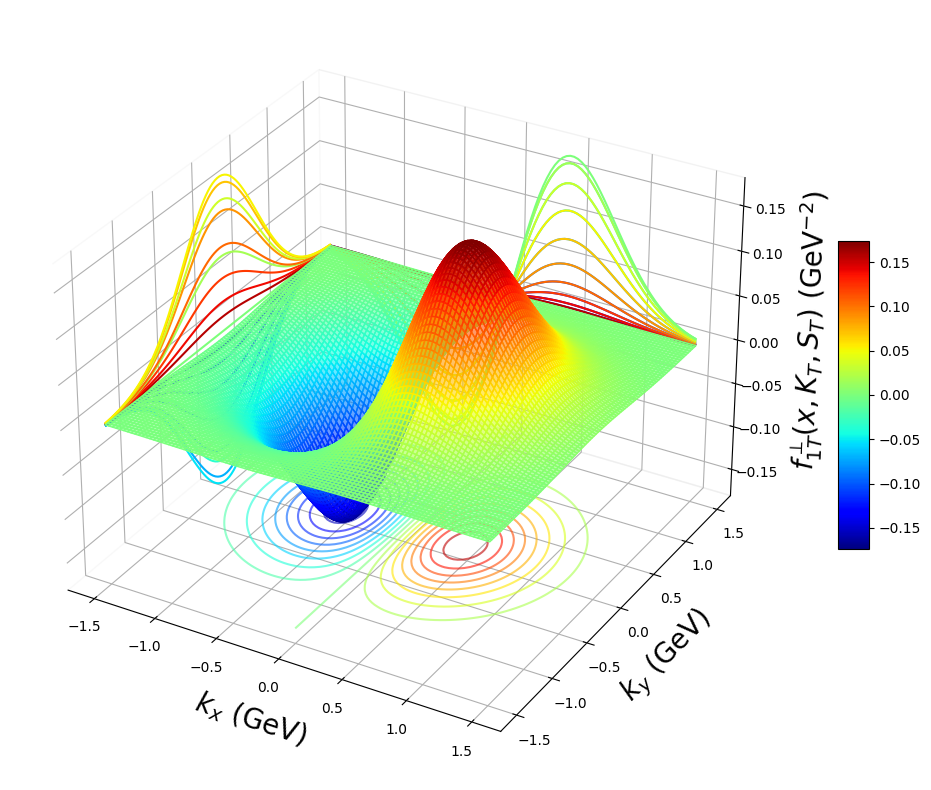

In [106]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import Normalize

# # Importing necessary modules and configurations
# sys.path.append('/content/jam3d_dev_lib')
# sys.path.append('/content/jam3dlib')
# os.environ["JAM3D"] = "/content/jam3d_dev_lib"
# from tools.tools import checkdir, save, load, lprint
# import tools.config
# from tools.config import load_config, conf
# from tmd import TMD

# # Initialize TMD
# tag = 'JAM3D_2022'
# tmd = TMD(tag)

# Function to calculate plot function values
def plot_function_u(irep, x, Q2, kTx, kTy):
    kT = np.sqrt(kTx**2 + kTy**2)
    #return tmd.eval(x, Q2, kT, 'p', 'pdf', irep, icol=False)[1] - kTx / M * tmd.eval(x, Q2, kT, 'p', 'sivers', irep, icol=False)[1]
    return - kTx / M * tmd.eval(x, Q2, kT, 'p', 'sivers', irep, icol=False)[1]

# Setting up the variables
kTx = np.linspace(-1.5, 1.5, 100)
kTy = np.linspace(-1.5, 1.5, 100)
#kTx = np.linspace(-0.75, 0.75, 100)
#kTy = np.linspace(-0.75, 0.75, 100)
X, Y = np.meshgrid(kTx, kTy)
x_values = [0.1,]#np.linspace(0.1, 0.2, 3)  # we can adjust as needed to match the range and number of x slices in the provided image
Q2 = 10.0
irep = 0  # Choose a specific replica

# Generating the data
Z = []
for x in x_values:
    Z_slice = []
    for ky in kTy:
        Z_row = []
        for kx in kTx:
            Z_row.append(plot_function_u(irep, x, Q2, kx, ky))
        Z_slice.append(Z_row)
    Z.append(Z_slice)

# Converting list to numpy array for better handling
Z = np.array(Z)

# Plotting the figures
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Creating a color map
norm = Normalize(vmin=Z.min(), vmax=Z.max())
#colors = cm.viridis(norm(Z))
colors = cm.jet(norm(Z))

# Plotting the data
for i, x in enumerate(x_values):
    #ax.set_proj_type('persp', focal_length=0.2)  # FOV = 157.4 deg
    ax.plot_surface(X, Y, Z[i], rstride=1, cstride=1, facecolors=colors[i], shade=False,alpha=0.6)
    ax.contour(X, Y, Z[i], zdir='z', levels=20, offset=Z[i].min()+0.01, cmap='jet',alpha=0.6)
    #ax.contour(X, Y, Z[i], zdir='z', offset=-0.02*i, cmap='jet',alpha=0.6)#, cmap='viridis')
    ax.contour(X, Y, Z[i], zdir='y',levels=20, offset=1.5, cmap='jet')
    ax.contour(X, Y, Z[i], zdir='x',levels=20, offset=-1.5, cmap='jet')
    #ax.contourf(X, Y, Z[i], levels=20, zdir='z', offset=Z[i].max(), cmap='jet')
# Get rid of colored axes planes
# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Adding color bars
m = cm.ScalarMappable(cmap=cm.jet, norm=norm)
m.set_array(Z)
cbar = plt.colorbar(m, shrink=0.4, aspect=10)
#cbar.set_label(r'$f_{1T}^{\perp}(x,K_T,S_T)\;(GeV^{-2})$',size = 20)

# Labels and title
ax.set_xlabel(r'$k_{x}$ (GeV)',size = 20, labelpad=10)
ax.set_ylabel(r'$k_{y}$ (GeV)',size = 20, labelpad=10)
ax.set_zlabel(r'$f_{1T}^{\perp}(x,K_T,S_T)$ (GeV$^{-2}$)',size = 20, labelpad=12)
#ax.set_title(r'${\rm u \; quark},\; x=0.1,\; Q^2=10$ GeV$^2$',size = 20)

plt.tight_layout()
plt.show()
fig.savefig("density_sivers.pdf")


In [107]:
from google.colab import files
files.download("density_sivers.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-16-eb65f4442d07>:66: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(m, shrink=0.5, aspect=5)


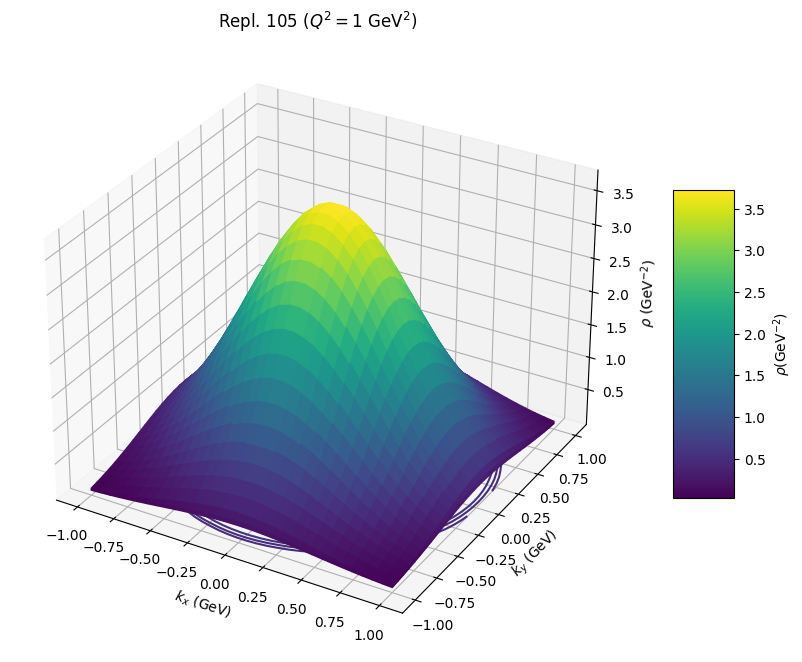

In [ ]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import Normalize

# # Importing necessary modules and configurations
# sys.path.append('/content/jam3d_dev_lib')
# sys.path.append('/content/jam3dlib')
# os.environ["JAM3D"] = "/content/jam3d_dev_lib"
# from tools.tools import checkdir, save, load, lprint
# import tools.config
# from tools.config import load_config, conf
# from tmd import TMD

# # Initialize TMD
# tag = 'JAM3D_2022'
# tmd = TMD(tag)

# Function to calculate plot function values
def plot_function_u(irep, x, Q2, kTx, kTy):
    kT = np.sqrt(kTx**2 + kTy**2)
    return tmd.eval(x, Q2, kT, 'p', 'pdf', irep, icol=False)[1] - kTx / 0.93891897 * tmd.eval(x, Q2, kT, 'p', 'sivers', irep, icol=False)[1]
    # return - kTx / 0.93891897 * tmd.eval(x, Q2, kT, 'p', 'sivers', irep, icol=False)[1]

# Setting up the variables
kTx = np.linspace(-1, 1, 32)
kTy = np.linspace(-1, 1, 32)
X, Y = np.meshgrid(kTx, kTy)
x_values = np.linspace(0.1, 0.2, 3)  # we can adjust as needed to match the range and number of x slices in the provided image
Q2 = 10.0
irep = 0  # Choose a specific replica

# Generating the data
Z = []
for x in x_values:
    Z_slice = []
    for kx in kTx:
        Z_row = []
        for ky in kTy:
            Z_row.append(plot_function_u(irep, x, Q2, kx, ky))
        Z_slice.append(Z_row)
    Z.append(Z_slice)

# Converting list to numpy array for better handling
Z = np.array(Z)

# Plotting the figures
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Creating a color map
norm = Normalize(vmin=Z.min(), vmax=Z.max())
colors = cm.viridis(norm(Z))

# Plotting the data
for i, x in enumerate(x_values):
    ax.plot_surface(X, Y, Z[i], rstride=1, cstride=1, facecolors=colors[i], shade=False)
    ax.contour(X, Y, Z[i], zdir='z', offset=-0.02*i, cmap='viridis')

# Adding color bars
m = cm.ScalarMappable(cmap=cm.viridis, norm=norm)
m.set_array(Z)
cbar = plt.colorbar(m, shrink=0.5, aspect=5)
cbar.set_label(r'$\rho$(GeV$^{-2}$)')

# Labels and title
ax.set_xlabel(r'$k_x$ (GeV)')
ax.set_ylabel(r'$k_y$ (GeV)')
ax.set_zlabel(r'$\rho$ (GeV$^{-2}$)')
ax.set_title(r'Repl. 105 ($Q^2=1$ GeV$^2$)')

plt.show()

parman: pdf
order: [1, 'pdf', 'widths1_uv']
order: [1, 'pdf', 'widths1_sea']
parman: pdfpi-
parman: ffpi
order: [1, 'ffpi', 'widths1_fav']
order: [1, 'ffpi', 'widths1_ufav']
parman: ffk
order: [1, 'ffk', 'widths1_fav']
order: [1, 'ffk', 'widths1_ufav']
parman: ffh
parman: transversity
order: [1, 'transversity', 'widths1_uv']
order: [1, 'transversity', 'u N0 1']
order: [1, 'transversity', 'u N1 1']
order: [1, 'transversity', 'u a0 1']
order: [1, 'transversity', 'u b0 1']
order: [1, 'transversity', 'u b1 1']
order: [1, 'transversity', 'd N0 1']
order: [1, 'transversity', 'd N1 1']
order: [1, 'transversity', 'd a0 1']
parman: collinspi
order: [1, 'collinspi', 'widths1_fav']
order: [1, 'collinspi', 'widths1_ufav']
order: [1, 'collinspi', 'u N0 1']
order: [1, 'collinspi', 'u N1 1']
order: [1, 'collinspi', 'u a0 1']
order: [1, 'collinspi', 'u a1 1']
order: [1, 'collinspi', 'u b0 1']
order: [1, 'collinspi', 'u b1 1']
order: [1, 'collinspi', 'u b0 2']
order: [1, 'collinspi', 'u b1 2']
order: [

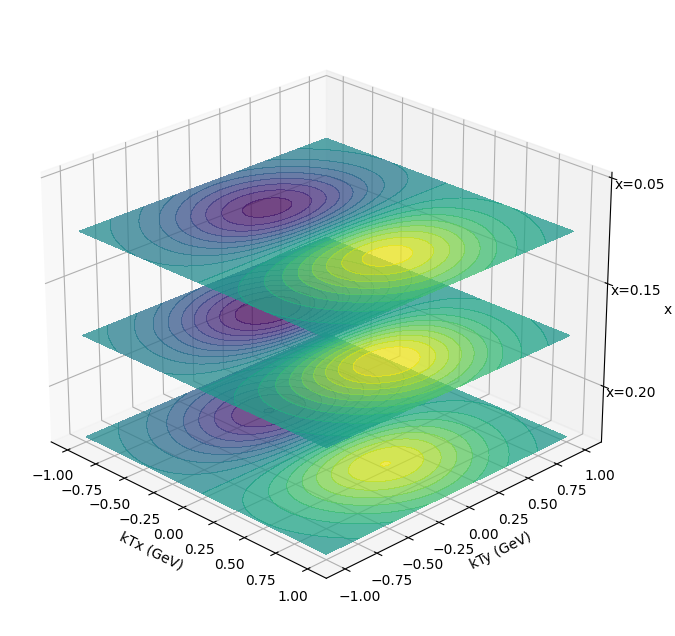

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from tmd import TMD

# Initialize the TMD model
tag = 'JAM3D_2022'
tmd = TMD(tag)
M = 0.938  # Proton mass in GeV

def plot_function_u(x, Q2, kTx, kTy, irep=0):
    kT = np.sqrt(kTx**2 + kTy**2)
    # return tmd.eval(x, Q2, kT, 'p', 'pdf', irep, icol=False)[1] - kTx/M * tmd.eval(x, Q2, kT, 'p', 'sivers', irep, icol=False)[1]
    return - kTx / 0.93891897 * tmd.eval(x, Q2, kT, 'p', 'sivers', irep, icol=False)[1]

# Meshgrid for kT components
kTx = np.linspace(-1, 1, 100)
kTy = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(kTx, kTy)
x_values = [0.05, 0.15, 0.20]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Adjust this value to increase or decrease the space between layers
layer_distance = 1.5
offsets = np.arange(0, layer_distance * len(x_values), layer_distance)

for x, offset in zip(x_values, offsets):
    Z = np.array([[plot_function_u(x, 1, tx, ty) for tx, ty in zip(ktx, kty)] for ktx, kty in zip(X, Y)])
    ax.contourf(X, Y, Z + offset, zdir='z', offset=-offset, cmap=cm.viridis, levels=20, alpha=0.75)

# Setting the limits and labels for better clarity and visibility
ax.set_xlabel('kTx (GeV)')
ax.set_ylabel('kTy (GeV)')
ax.set_zlabel('x')
ax.set_zlim(-max(offsets), 0)

# Align the ticks to the middle of each slice
ax.set_zticks(-offsets + layer_distance / 2)
ax.set_zticklabels([f"x={x_val:.2f}" for x_val in x_values])

# Optimal view
ax.view_init(elev=25, azim=-45)

plt.show()
